In [1]:
from sim_chrom import SimChrom,IsoRP,IsoGLang,IsoBET,IsoLang
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
def plot(iso,dead_volume,inject,sim_len=3000,inject_width=5):
    c=np.linspace(0,1,100)
    chrom=SimChrom(1500,iso,dead_volume=dead_volume,pass_rate=0,inject=inject,inject_width=inject_width)
    chrom=np.array([ chrom.step() for i in range(sim_len)])
    isotherm=iso.iso(c)
    
    fig=plt.figure(figsize=(16,6))
    ax1 = fig.add_subplot(1, 3, 1)
    plt.title("Isotherm")
    plt.ylim((0, min([1,np.max(isotherm)*1.1 ])))
    plt.plot(c,isotherm)
    
    ax2 = fig.add_subplot(1, 3, 2)
    plt.title("Chrom")
    plt.plot(chrom,label="Chrom")
    ax2 = fig.add_subplot(1, 3, 3)
    plt.title("Log Chrom")
    plt.plot(chrom,label="Chrom")
    plt.yscale("log")
    plt.ylim((1e-6,np.max(chrom)*2))
    plt.show()

In [3]:
inject=1 #インジェクトする時の濃度を1とする　（BETモデルを使う時は、飽和濃度を超えないように注意)
dead_voulme=0 #配管デッドボリューム 1より大きいの時に有効　最初の段に大きな体積の段を追加して1次遅れIIRフィルタを構成する
rt=1.0 #グラフ描画の都合で、おおよその保持時間を制御するための正規化定数

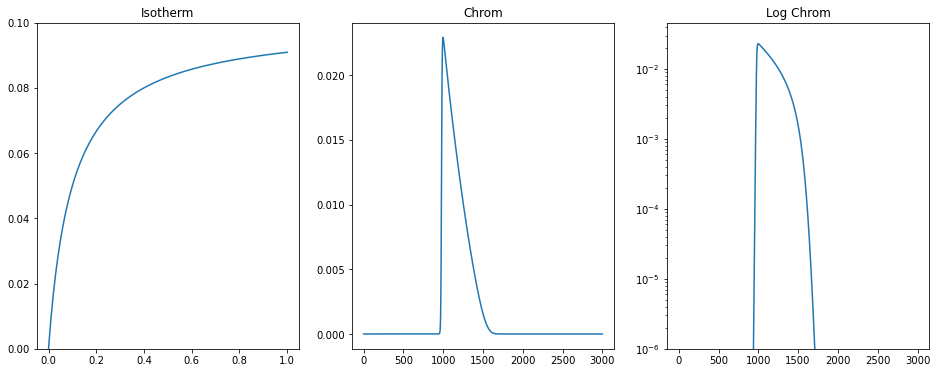

In [4]:
Ws=0.1
a=rt/Ws
iso=IsoLang(a,Ws)
plot(iso,dead_voulme,inject)

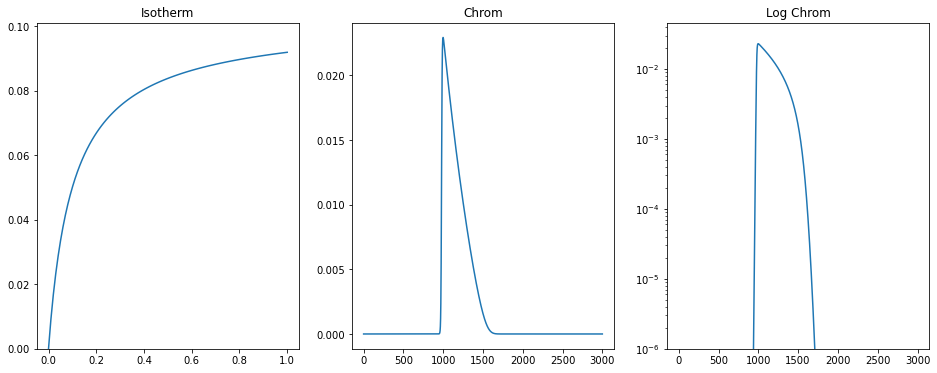

In [5]:

C0=100  #satulation 
W1=0.1
a=rt/W1*C0 #おおよそのRTを満たすために、受動的に決定 
iso=IsoBET(a,W1,C0,eps=1e-15,alpha=4e-1)
plot(iso,dead_voulme,inject)

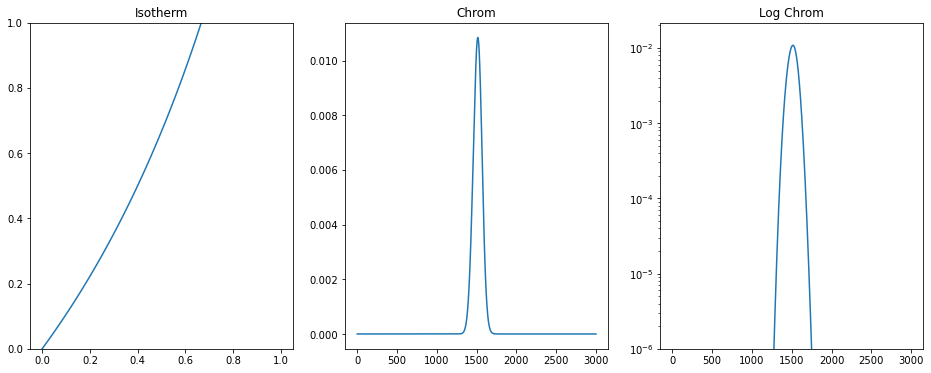

In [6]:
C0=2  #satulation 
W1=2
a=rt/W1*C0 #おおよそのRTを満たすために、受動的に決定 
iso=IsoBET(a,W1,C0,eps=1e-15,alpha=4e-1)
plot(iso,dead_voulme,0.1)

0.2


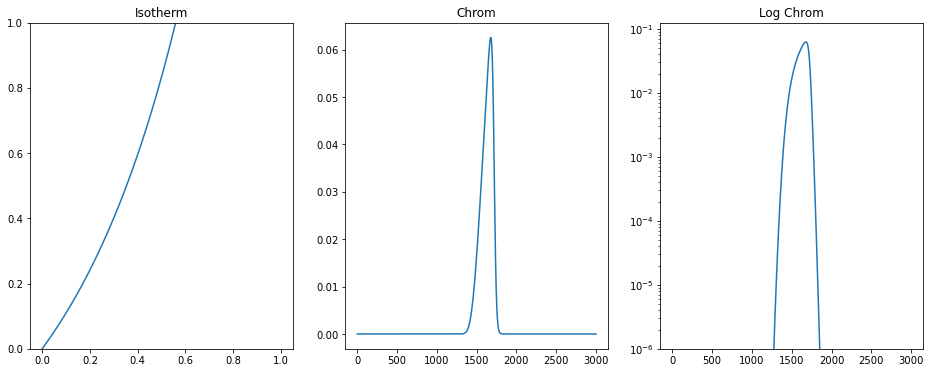

In [15]:
C0=2#satulation 
W1=10
a=rt/W1*C0 #おおよそのRTを満たすために、受動的に決定 
print(a)
iso=IsoBET(a,W1,C0,eps=1e-10,alpha=2e-1)
plot(iso,dead_voulme,inject,inject_width=10)

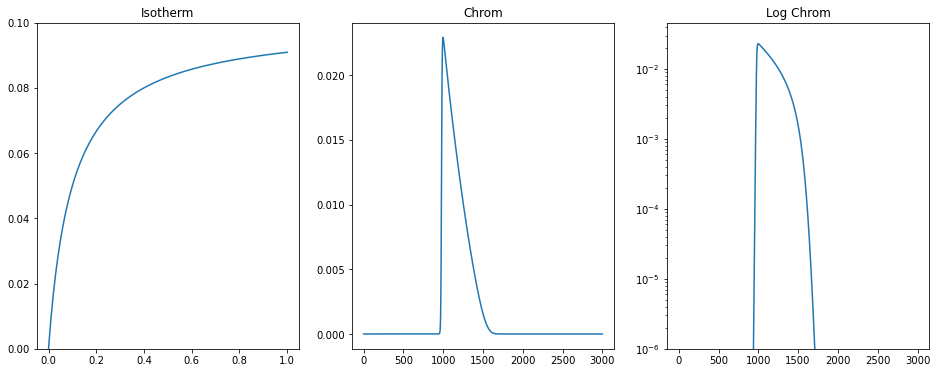

In [8]:
Ws=0.1
a=rt/Ws
iso=IsoLang(a,Ws)
plot(iso,dead_voulme,inject)
